### Features Scaling

Dans ce devoir, nous allons normaliser les données du dataset "Advertising" pour réaliser un modèle de régression linéaire multiple. Nous utiliserons deux méthodes de normalisation différentes : les formules mathématiques "from scratch" et en utilisant `StandardScaler`. Enfin, nous comparerons les résultats obtenus avec chaque méthode.

1. **Normalisation des Données "From Scratch" :**
   - Implémenter les formules mathématiques pour normaliser les données du dataset "Advertising" sans utiliser de bibliothèques externes.

2. **Normalisation des Données avec StandardScaler :**
   - Utiliser la fonction `StandardScaler` de bibliothèques comme scikit-learn pour normaliser les données du dataset "Advertising".

3. **Comparaison des Résultats :**
   - Comparer les performances des modèles de régression linéaire multiple obtenus avec chaque méthode de normalisation. Vous pouvez comparer les performances en utilisant des métriques telles que l'erreur quadratique moyenne (MSE), l'erreur absolue moyenne (MAE), ou toute autre métrique pertinente.


- Code source pour les deux méthodes de normalisation (From Scratch et StandardScaler).
- Résultats de la comparaison des performances des modèles de régression linéaire multiple.
- Analyses et interprétations des résultats.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
ads_dataset = pd.read_csv('Advertising.csv')
ads_dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [11]:
features = ads_dataset[ads_dataset.iloc[:, :3].columns.tolist()]
features

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [13]:
target = ads_dataset[[ads_dataset.iloc[:, -1].name]]
target

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9
...,...
195,7.6
196,14.0
197,14.8
198,25.5


In [14]:
x_train, x_test, y_train, y_test =  train_test_split(features, target, test_size=0.2, random_state=42)

print('x_train shape  : ', x_train.shape)
print('x_test shape  : ', x_test.shape)
print('y_train shape  : ', y_train.shape)
print('y_test shape  : ', y_test.shape)

x_train shape  :  (160, 3)
x_test shape  :  (40, 3)
y_train shape  :  (160, 1)
y_test shape  :  (40, 1)


In [15]:
def z_score_normalization(data):
    """
    Normalise les caractéristiques d'un ensemble de données en utilisant la méthode Z-score.

    Args:
    - data : un tableau NumPy contenant les données à normaliser. Chaque colonne représente une caractéristique.

    Returns:
    - data_normalized : le tableau NumPy contenant les données normalisées.
    - mean : le tableau NumPy contenant les moyennes de chaque caractéristique avant normalisation.
    - std : le tableau NumPy contenant les déviations standard de chaque caractéristique avant normalisation.
    """
    # Calcul des moyennes et des déviations standard de chaque caractéristique
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)

    # Normalisation des données en utilisant la méthode Z-score
    data_normalized = (data - mean) / std

    return data_normalized, mean, std

In [16]:
x_train_norm, mean,std=z_score_normalization(x_train)
x_train_norm
#x_train_norm= (x_train - x_train.mean())/x_train.std()

,TV,Radio,Newspaper
79,-0.404248,-1.028237,-0.337675
197,0.320608,-0.919828,-1.161439
38,-1.270511,0.259124,0.254251
24,-1.042359,-0.696233,-0.574446
122,0.879103,-1.387343,-0.707629
...,...,...,...
106,-1.485591,-0.804643,-0.012116
14,0.642634,0.679210,0.791917
92,0.804241,0.719863,1.433170
179,0.185143,-0.872399,-0.608975


In [18]:
x_train_norm.mean()

TV          -2.942091e-16
Radio       -2.040035e-16
Newspaper    1.665335e-17
dtype: float64

In [19]:
x_train_norm.std()

TV           1.00314
Radio        1.00314
Newspaper    1.00314
dtype: float64

In [20]:
mean

TV           150.019375
Radio         22.875625
Newspaper     29.945625
dtype: float64

In [21]:
std

TV           84.154634
Radio        14.758878
Newspaper    20.272798
dtype: float64

In [22]:
x_test_norm= (x_test - mean)/std
x_test_norm

,TV,Radio,Newspaper
95,0.157812,0.591127,1.132275
15,0.539253,1.681996,1.132275
30,1.697834,0.367533,0.653801
158,-1.643633,0.950233,0.752455
128,0.835137,1.770079,-1.319286
115,-0.890258,0.821497,1.122409
69,0.793547,1.424524,-0.135434
170,-1.188519,-0.763989,-0.569513
174,0.860091,-1.319587,-0.830947
45,0.298030,-0.025451,0.076673


In [25]:
#x train:
X_train_norm_1 = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
X_train_norm_1

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01,
         1.00000000e+00],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00,
         1.00000000e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01,
         1.00000000e+00],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01,
         1.00000000e+00],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01,
         1.00000000e+00],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01,
         1.00000000e+00],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01,
         1.00000000e+00],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01,
         1.00000000e+00],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01,
         1.00000000e+00],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01,
         1.00000000e+00],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01,
         1.00000000e+00],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01,
      

In [26]:
X_test_norm_1 = np.hstack((x_test_norm, np.ones((x_test.shape[0], 1))))
X_test_norm_1

array([[ 0.15781217,  0.59112727,  1.13227461,  1.        ],
       [ 0.53925283,  1.68199613,  1.13227461,  1.        ],
       [ 1.69783431,  0.36753303,  0.65380096,  1.        ],
       [-1.64363349,  0.95023317,  0.75245532,  1.        ],
       [ 0.83513672,  1.77007871, -1.31928629,  1.        ],
       [-0.89025846,  0.82149709,  1.12240918,  1.        ],
       [ 0.79354661,  1.42452397, -0.13543394,  1.        ],
       [-1.18851892, -0.76398933, -0.56951314,  1.        ],
       [ 0.86009078, -1.31958713, -0.8309472 ,  1.        ],
       [ 0.29803023, -0.02545078,  0.07667294,  1.        ],
       [-1.40835233,  0.11683646, -1.36861347,  1.        ],
       [-1.11484502, -1.16374872, -0.01211599,  1.        ],
       [ 1.00387371, -1.31958713,  2.70581169,  1.        ],
       [-1.71849568,  0.47594236, -1.01345777,  1.        ],
       [-0.12500054, -1.40766971, -0.16503025,  1.        ],
       [ 0.23980408, -1.02146148,  0.25918351,  1.        ],
       [-1.69591819,  0.

In [27]:
Y_train = y_train.values
Y_train

array([[11. ],
       [14.8],
       [10.1],
       [ 9.7],
       [16.6],
       [ 7.6],
       [10.5],
       [14.6],
       [10.4],
       [12. ],
       [14.6],
       [16.7],
       [ 7.2],
       [ 6.6],
       [ 9.4],
       [11. ],
       [10.9],
       [25.4],
       [ 7.6],
       [16.7],
       [20. ],
       [20.5],
       [11.9],
       [ 9.2],
       [17.8],
       [ 6.6],
       [20.7],
       [ 6.7],
       [14. ],
       [ 9.5],
       [10.7],
       [11.9],
       [19.9],
       [17.1],
       [15.9],
       [20.9],
       [15. ],
       [20.7],
       [16.7],
       [21.8],
       [12. ],
       [14.2],
       [10.6],
       [17.3],
       [11.9],
       [20.2],
       [13.3],
       [25.4],
       [10.8],
       [24.2],
       [ 5.6],
       [19.2],
       [23.8],
       [17.4],
       [17.4],
       [17.3],
       [12.9],
       [11.8],
       [20.9],
       [15.5],
       [17.9],
       [13.2],
       [20.1],
       [10.3],
       [19.8],
       [12.3],
       [12

In [28]:
Y_test = y_test.values
Y_test

array([[16.9],
       [22.4],
       [21.4],
       [ 7.3],
       [24.7],
       [12.6],
       [22.3],
       [ 8.4],
       [16.5],
       [16.1],
       [11. ],
       [ 8.7],
       [16.9],
       [ 5.3],
       [10.3],
       [16.7],
       [ 5.5],
       [16.6],
       [11.3],
       [18.9],
       [19.7],
       [12.5],
       [10.9],
       [22.2],
       [11.3],
       [ 8.1],
       [21.7],
       [13.4],
       [10.6],
       [ 5.7],
       [15.6],
       [11.3],
       [23.7],
       [ 8.7],
       [16.1],
       [20.7],
       [11.6],
       [20.8],
       [11.9],
       [ 6.9]])

In [29]:
#construction aléatoire de Theta initial:
np.random.seed(0)

theta = np.random.randn(X_train_norm_1.shape[1], 1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798],
       [2.2408932 ]])

In [30]:
def model(X, theta): # définir le modèle
    return X.dot(theta)

def cost_function(X, y, theta): #définir la fonction coût
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

cost_function(X_train_norm_1, Y_train ,theta)

91.72522545503882

In [31]:
# définir la fonction de gradient
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)
# Définir la descente de gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [96]:
#entrainement:
theta_final, cost_h = gradient_descent(X_train_norm_1, Y_train, theta, learning_rate=0.8, n_iterations=10)

theta_final

array([[ 4.58730275],
       [ 1.48877709],
       [ 0.08897024],
       [15.33062366]])

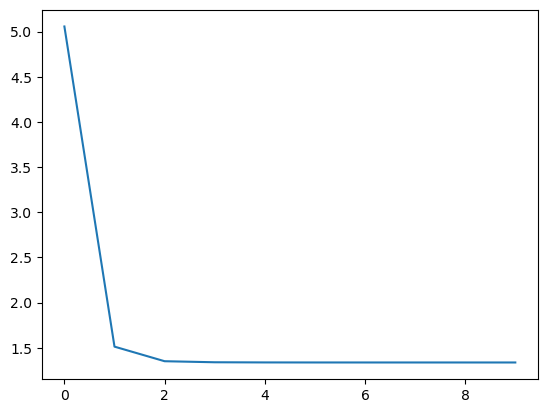

In [97]:
plt.plot(range(10), cost_h)
plt.show()

In [98]:
# Evaluation du modèle
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_scratch = coef_determination(Y_test, model(X_test_norm_1,theta_final))
coef_scratch

0.9058604512058308

In [69]:
predictions=model(X_test_norm_1, theta_final)
predictions

array([[17.03529412],
       [20.40855615],
       [23.72420241],
       [ 9.27202156],
       [21.67752298],
       [12.56947655],
       [21.07842279],
       [ 8.69023584],
       [17.23749273],
       [16.66640782],
       [ 8.92117163],
       [ 8.48314291],
       [18.21361423],
       [ 8.06468863],
       [12.64712455],
       [14.93332658],
       [ 8.12802708],
       [17.8971753 ],
       [11.00887963],
       [20.47606547],
       [20.80848175],
       [12.60352914],
       [10.90146685],
       [22.390127  ],
       [ 9.41673772],
       [ 7.92622167],
       [20.83692413],
       [13.81420792],
       [10.77128801],
       [ 7.92372733],
       [15.96065693],
       [10.63384414],
       [20.80211165],
       [10.43631128],
       [21.57974163],
       [21.18020624],
       [12.12352332],
       [22.81095913],
       [12.60851247],
       [ 6.46553561]])

In [70]:
from sklearn.preprocessing import StandardScaler

### En Utilisant StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
scaler.fit(x_train)

StandardScaler()

In [73]:
X_train_normalized = scaler.transform(x_train)
X_train_normalized

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01],
       [-1.67928215e+00,  1.76330312e+00,  2.22240532e+00],
       [-1.68997675e+00,  1.08574483e+00,  1.01882210e+00],
       [-8.74810708e-01, -1.49575229e+00, -7.47090988e-01],
       [-2.45017701e-01, -1.16374872e+00,  6.68075010e-02],
       [-9.10459368e-01, -3.98107848e-01

In [74]:
X_test_normalized = scaler.transform(x_test)
X_test_normalized

array([[ 0.15781217,  0.59112727,  1.13227461],
       [ 0.53925283,  1.68199613,  1.13227461],
       [ 1.69783431,  0.36753303,  0.65380096],
       [-1.64363349,  0.95023317,  0.75245532],
       [ 0.83513672,  1.77007871, -1.31928629],
       [-0.89025846,  0.82149709,  1.12240918],
       [ 0.79354661,  1.42452397, -0.13543394],
       [-1.18851892, -0.76398933, -0.56951314],
       [ 0.86009078, -1.31958713, -0.8309472 ],
       [ 0.29803023, -0.02545078,  0.07667294],
       [-1.40835233,  0.11683646, -1.36861347],
       [-1.11484502, -1.16374872, -0.01211599],
       [ 1.00387371, -1.31958713,  2.70581169],
       [-1.71849568,  0.47594236, -1.01345777],
       [-0.12500054, -1.40766971, -0.16503025],
       [ 0.23980408, -1.02146148,  0.25918351],
       [-1.69591819,  0.35398186,  0.56501203],
       [ 0.56539519,  0.02875388, -0.7766873 ],
       [-0.88788188, -0.17451361,  0.12600012],
       [ 1.03833409,  0.31332837, -0.93453428],
       [ 0.94445928,  0.63855635,  2.182

In [75]:
#x train:
X_train_norm_2 = np.hstack((x_train_norm, np.ones((x_train.shape[0], 1))))
X_train_norm_2

array([[-4.04248386e-01, -1.02823707e+00, -3.37675384e-01,
         1.00000000e+00],
       [ 3.20607716e-01, -9.19827737e-01, -1.16143931e+00,
         1.00000000e+00],
       [-1.27051084e+00,  2.59123702e-01,  2.54250789e-01,
         1.00000000e+00],
       [-1.04235941e+00, -6.96233499e-01, -5.74445854e-01,
         1.00000000e+00],
       [ 8.79103401e-01, -1.38734296e+00, -7.07629243e-01,
         1.00000000e+00],
       [-1.32873699e+00, -1.29926038e+00, -7.96418169e-01,
         1.00000000e+00],
       [-9.43731452e-01, -4.65863678e-01,  5.35415722e-01,
         1.00000000e+00],
       [-3.23140256e-02,  6.94073782e-02, -5.34984109e-01,
         1.00000000e+00],
       [-5.39713297e-01, -1.16374872e+00,  2.19721762e-01,
         1.00000000e+00],
       [-8.75998996e-01,  3.13328366e-01, -6.87898371e-01,
         1.00000000e+00],
       [-8.53421511e-01,  1.62101588e+00,  2.24654481e-01,
         1.00000000e+00],
       [ 2.18414888e-01, -1.06889056e+00, -8.45745350e-01,
      

In [76]:
X_test_norm_2 = np.hstack((X_test_normalized, np.ones((x_test.shape[0], 1))))
X_test_norm_2

array([[ 0.15781217,  0.59112727,  1.13227461,  1.        ],
       [ 0.53925283,  1.68199613,  1.13227461,  1.        ],
       [ 1.69783431,  0.36753303,  0.65380096,  1.        ],
       [-1.64363349,  0.95023317,  0.75245532,  1.        ],
       [ 0.83513672,  1.77007871, -1.31928629,  1.        ],
       [-0.89025846,  0.82149709,  1.12240918,  1.        ],
       [ 0.79354661,  1.42452397, -0.13543394,  1.        ],
       [-1.18851892, -0.76398933, -0.56951314,  1.        ],
       [ 0.86009078, -1.31958713, -0.8309472 ,  1.        ],
       [ 0.29803023, -0.02545078,  0.07667294,  1.        ],
       [-1.40835233,  0.11683646, -1.36861347,  1.        ],
       [-1.11484502, -1.16374872, -0.01211599,  1.        ],
       [ 1.00387371, -1.31958713,  2.70581169,  1.        ],
       [-1.71849568,  0.47594236, -1.01345777,  1.        ],
       [-0.12500054, -1.40766971, -0.16503025,  1.        ],
       [ 0.23980408, -1.02146148,  0.25918351,  1.        ],
       [-1.69591819,  0.

In [78]:
coef_standard_scaler = coef_determination(Y_test, model(X_test_norm_2,theta_final))
coef_standard_scaler

0.9058490651819

### Comparaison

In [79]:
print(f"Coef determination From scratch :{coef_scratch} | Coef determination using StandardScaler :{coef_standard_scaler}")

Coef determination From scratch :0.9058490651819 | Coef determination using StandardScaler :0.9058490651819
